In [9]:
# Daeseob Lim
# 7/23/2019
# Code studied from Deep Learning with Python
# Credits/Author: Francois Chollet

# Multiclass Classification Newswires and Topics

import keras
import numpy as np
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters

# Getting data
# 10,000 most frequently occuring words in list of integers
# Labels is an integer between 0 and 45 (number of topics)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# As did in the IMDB reviews, we need to vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorizing Data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# One hot encoding for labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Structuring network
# The ouput will be a probability for each topic possible
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Need to read up on compiling options
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting up validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Fitting data into our model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 227us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


Having trained the data, I am now going to look at training and validation loss. This is essential for creating a network that is accurate for a generalized data and not just the training data. When the model becomes too fit for the training data, it is called overfitting and plotting. The following plots will help demonstrate the effects of overfitting.

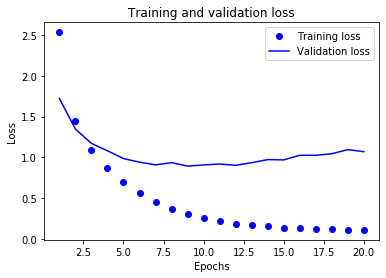

In [6]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

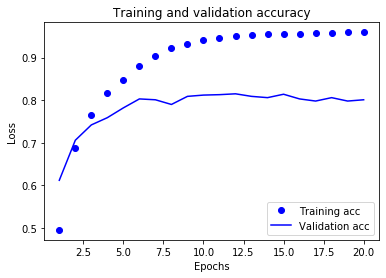

In [7]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As seen on the first graph, the training loss keeps decreasing; while the validation loss seems stagnant after 8 epochs. On the other hand, on the second graph, the training accuracy keeps increasing; while the validation accuracy seems stagnant after 8 epochs. Clearly, after the 8th epochs, the learning process is only benefiting the training data (more specific) but not the validation data (more general). So we will train the model only up to 8th epochs.

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

predictions = model.predict(x_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 198us/step - loss: 2.6046 - acc: 0.5224 - val_loss: 1.6889 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 147us/step - loss: 1.3990 - acc: 0.7100 - val_loss: 1.2839 - val_acc: 0.7100
Epoch 3/8
7982/7982 [==============================] - 1s 145us/step - loss: 1.0371 - acc: 0.7826 - val_loss: 1.0868 - val_acc: 0.7670
Epoch 4/8
7982/7982 [==============================] - 1s 147us/step - loss: 0.8156 - acc: 0.8310 - val_loss: 0.9904 - val_acc: 0.7940
Epoch 5/8
7982/7982 [==============================] - 1s 149us/step - loss: 0.6521 - acc: 0.8653 - val_loss: 0.9274 - val_acc: 0.8050
Epoch 6/8
7982/7982 [==============================] - 1s 146us/step - loss: 0.5178 - acc: 0.8940 - val_loss: 0.9112 - val_acc: 0.8020
Epoch 7/8
7982/7982 [==============================] - 1s 162us/step - loss: 0.4153 - acc: 0.9138 - val_loss: 0.8535 - val_acc: 0.8230
Epoch 8

Our model is about 78% accurate.
predictions will be a 2D tensor where each prediction will be a vector of 46.
The max of the vector is your prediction.